# Bayesian Linear Regression

Consider the following standard setup for linear regression. The formula used is 
$$y = X \beta + \epsilon, \quad \epsilon \sim N(0, \sigma^2),$$
where $y$ is the response, $X$ is the data in the form of an $n\times p$ matrix where $n$ is the number of samples and $p$ is the nuber of parameters, $\beta$ is a vector of length $p$ representing the model parameters, and $\epsilon$ is a vector of size $p$ denoting the model error. A couple of additional assumptions are made which are that the errors are normally distributed with mean 0 and variace $\sigma^2$,
$$\epsilon \sim N(0, \sigma^2),$$
and the respose is normally distributed with mean $\beta^T x_i$ and variance $\sigma^2$,
$$y_i \sim N(\beta^T x_i, \sigma^2).$$


Regular linear regression, which could also be described as "frequentist", simply returns a single estimate for the parameters $\beta_{OLS}$. This provides no sense of the probability distribution for $\beta_{OLS}$, it's variance, or how it might change as a result of small variations in the data $X$. Indeed, if small changes in the training data change the learned model significantly, it is considered to be indicative of overfitting.

## The Bayesian Approach

In the Bayesian Approach to linear regression, the $\beta$ are found by maximizing the a posteriori distribution with respect to the observations $y$, i.e.,
$$\hat{\beta}_{MAP} = \arg \max_{\beta} P(\beta | y),$$
where $\hat{\beta}_{MAP}$ is the maximum a posteriori (MAP) estimate for the model parameters $\beta$.

Using Bayes' theorem, we have
$$\hat{\beta}_{MAP} = \arg \max_{\beta} \frac{P(y | \beta) P(\beta)}{P(y)}.$$
Noting that the denominator of $\frac{P(y | \beta) P(\beta)}{P(y)}$ is independent of $\beta$, it can be dropped, giving
$$\hat{\beta}_{MAP} = \arg \max_{\beta} P(y | \beta) P(\beta).$$
Since the logarithm is monotonically increasing, the expression within the $\arg \max_{\beta}$ can be exchanged for its logarithm, giving
$$\hat{\beta}_{MAP} = \arg \max_{\beta} \left[ \log P(y | \beta) + \log P(\beta) \right].$$

# Specific Forms for $P(y | \beta)$ and $P(\beta)$

To simplify further, we must introduce specific forms for the likelihood, $P(y | \beta)$, and the prior, $P(\beta)$. Since we assumed from the outset that $y_i \sim N(\beta^T x_i, \sigma^2)$, we can write
$$P(y | \beta) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(y_i - \beta^T x_i)^2}{2\sigma^2} \right),$$
and thus
$$\log P(y | \beta) = \sum_{i=1}^{N} \left[ \log \frac{1}{\sqrt{2\pi \sigma^2}} - \frac{1}{2\sigma^2}(y_i - \beta^T x_i)^2 \right].$$

The specific form for the prior, $P(\beta)$, is more nuanced, since this is given by our prior beliefs about $\beta$ without being conditioned on the data. This makes our initial guess about $P(\beta)$ somewhat arbitrary, however it is standard to choose a Gaussian prior with means centered at zero and variance given by $\tau^2$,
$$P(\beta_j) = N(0, \tau^2) \qquad \forall\ j = 1,\dots,p.$$

Thus,
$$P(\beta) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi \tau^2}} \exp\left( -\frac{(\beta^T x_i)^2}{2\tau^2} \right),$$
giving
$$\log P(\beta) = \sum_{i=1}^{N} \left[ \log \frac{1}{\sqrt{2\pi \tau^2}} - \frac{1}{2\tau^2}(\beta_i)^2 \right].$$

# Recovering Ridge and Lasso Regression from Bayesian Linear Regression

Using the simplified forms of $\log P(y | \beta)$ and $\log P(\beta)$ we can continue to simplify $\hat{\beta}_{MAP}$,
$$\hat{\beta}_{MAP} = \arg \min_{\beta} \left[ \| y - X \beta \|_2^2 + \frac{\sigma^2}{\tau^2} \| \beta \|_2^2 \right].$$

If we let $\lambda = \frac{\sigma^2}{\tau^2}$ be a new parameter of the model, then
$$\hat{\beta}_{MAP} = \arg \min_{\beta} \left[ \| y - X \beta \|_2^2 + \lambda \| \beta \|_2^2 \right] = \hat{\beta}_{L2},$$
i.e. we have produced an expression that is identical to that of $\beta_{OLS}$ with a term representing ridge regression. Note that 

Lasso regression may also be reproduced using the Bayesian regression framework, by choosing a Laplacian prior for the $P(\beta)$
$$P(\beta_j) \propto e^{-\frac{|\beta_j|}{b}},$$
which leads to
$$\hat{\beta}_{MAP} = \arg \min_{\beta} \left[ \| y - X \beta \|_2^2 + \lambda \| \beta \|_1 \right] = \hat{\beta}_{L1},$$
where $\hat{\beta}_{L1}$ is the OLS estimate of $\beta$ with an additional Lasso regression term.



The Laplacian distribution is visualized in the cell below.

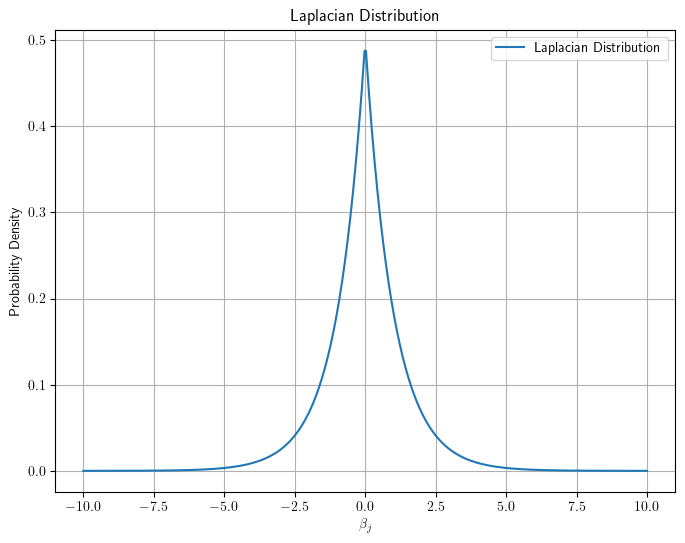

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True

def laplacian(x, mu=0, b=1):
    return (1 / (2 * b)) * np.exp(-np.abs(x - mu) / b)

x = np.linspace(-10, 10, 400)
y = laplacian(x)

# Plot the Laplacian function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Laplacian Distribution')
plt.title('Laplacian Distribution')
plt.xlabel(r'$\beta_j$')  # Use raw string for LaTeX
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()